In [ ]:
from transformers import AutoTokenizer
from mclt.datasets import DATASETS

stats = []
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')
for name, datamodule_class in DATASETS.items():
    datamodule = datamodule_class(tokenizer)
    datamodule.prepare_data()
    datamodule.setup()
    datasets = {attr: getattr(datamodule, attr) for attr in ('_train_dataset', '_val_dataset', '_test_dataset')}
    for k, v in datasets.items():
        stats.append({'dataset': name, 'split': k, 'size': len(v)})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


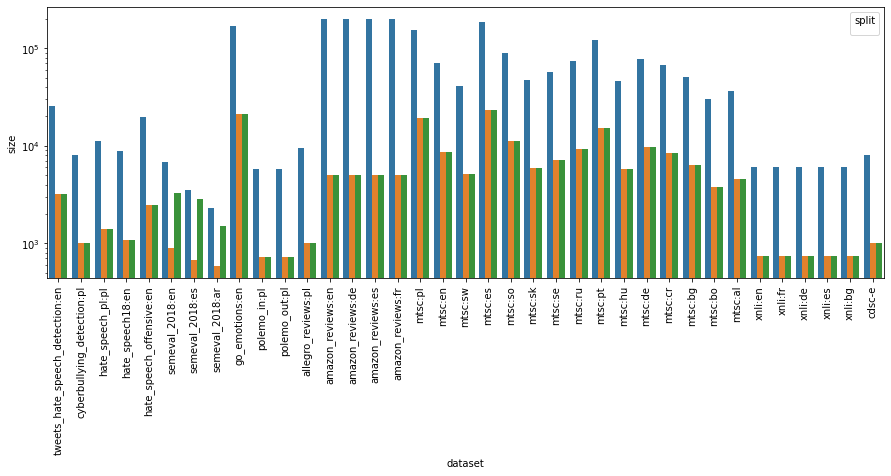

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
stats_df = pd.DataFrame(stats)
sns.barplot(
    x='dataset',
    y='size',
    hue='split',
    data=stats_df,
)

plt.xticks(rotation=90)
plt.yscale('log')